In [16]:
!nvcc --version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Feb__8_05:53:42_Coordinated_Universal_Time_2023
Cuda compilation tools, release 12.1, V12.1.66
Build cuda_12.1.r12.1/compiler.32415258_0
gcc (MinGW.org GCC-6.3.0-1) 6.3.0
Copyright (C) 2016 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [1]:
!pip3 install -U openmim
!mim install mmcv-full
!mim install mmdet==2.27.0

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
  Using cached mmcv_full-1.7.1-cp38-cp38-win_amd64.whl
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
  Using cached mmdet-2.27.0-py3-none-any.whl (1.5 MB)


In [2]:
!pip3 install mmrotate

  Using cached mmrotate-0.3.4-py3-none-any.whl (379 kB)


In [1]:
from mmcv.utils import collect_env
# collect_env()

# Check MMRotate installation
import mmrotate
print(mmrotate.__version__)

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())



c:\Users\Skyibis\miniconda3\envs\mightyconda\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


0.3.4
2.27.0
12.1
MSVC 193833130


In [4]:
!mim download mmrotate --config oriented_rcnn_r50_fpn_1x_dota_le90 --dest .

processing oriented_rcnn_r50_fpn_1x_dota_le90...
oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth exists in a:\MightyMicros
Successfully dumped oriented_rcnn_r50_fpn_1x_dota_le90.py to a:\MightyMicros


C:\Users\Skyibis\miniconda3\envs\mightyconda\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [8]:


import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector
import torch

# Choose to use a config and initialize the detector
config = 'src/pipeline/configs/oriented_rcnn_r50_fpn_1x_dota_le90.py'
# Setup a checkpoint file to load
checkpoint = 'oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth'
print(torch.cuda.is_available())
# Set the device to be used for evaluation
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint

checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
if torch.cuda.is_available():
    model.to(device)
# Convert the model into evaluation mode
model.eval()



True


FileNotFoundError: file "a:\MightyMicros\oriented_rcnn_r50_fpn_1x_dota_le90.py" does not exist

In [7]:
# Use the detector to do inference
img = 'data/demo.jpg'
result = inference_detector(model, img)

RuntimeError: indices should be either on cpu or on the same device as the indexed tensor (cpu)

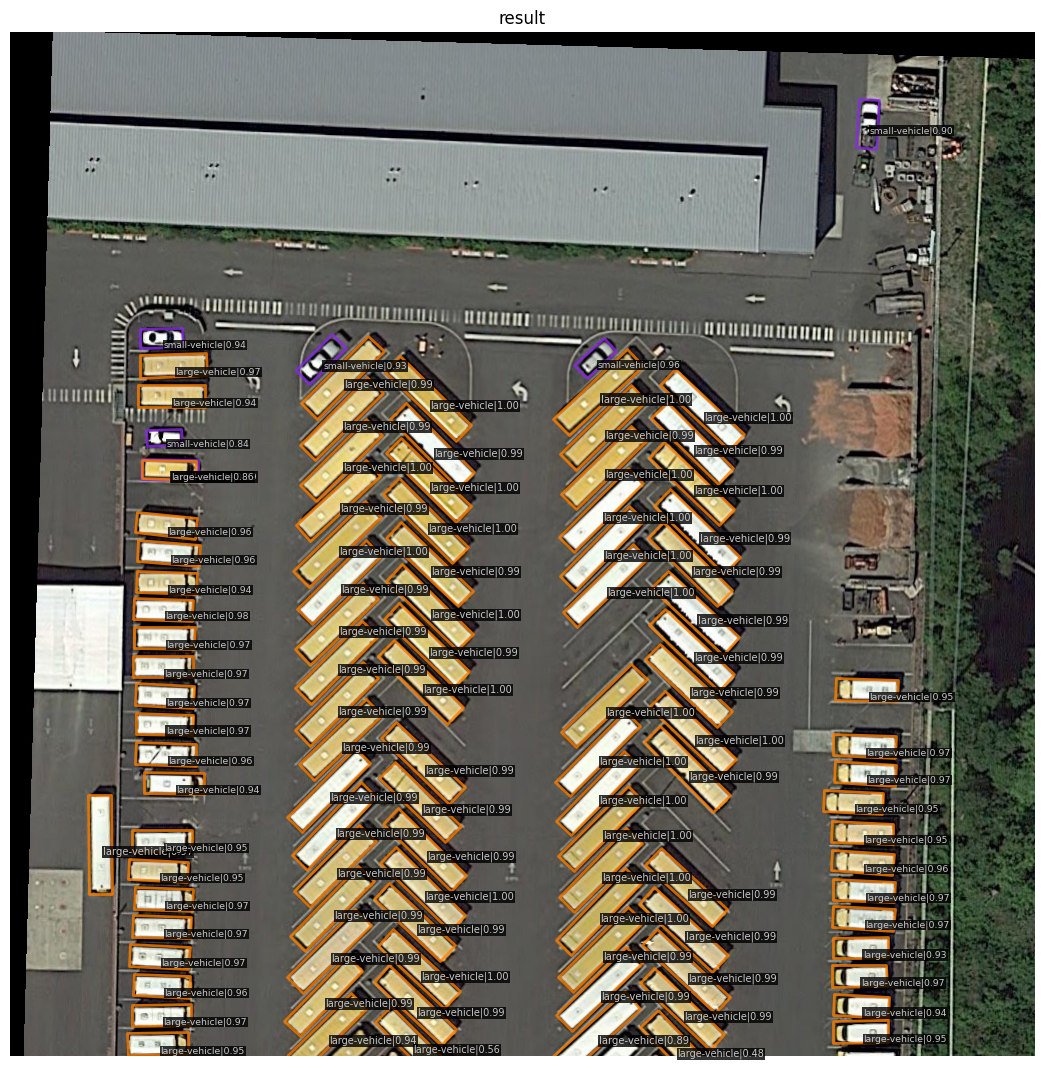

In [13]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3, palette='dota')